<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/02_03_Otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [23]:
img = "sudoku.png"
url = f"{base}{img}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40726  100 40726    0     0   266k      0 --:--:-- --:--:-- --:--:--  266k


In [24]:
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [25]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

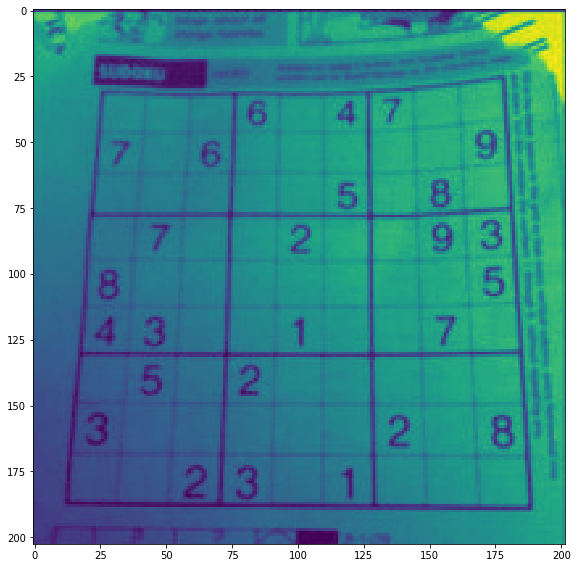

(203, 202)

In [26]:
im = loadImg(img)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
show(im)
im.shape

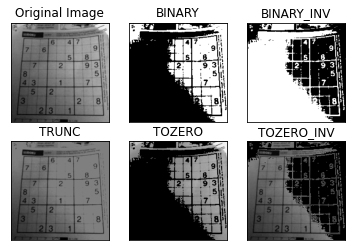

In [28]:
_, thresh1 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(im, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(im, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(im, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [im, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu

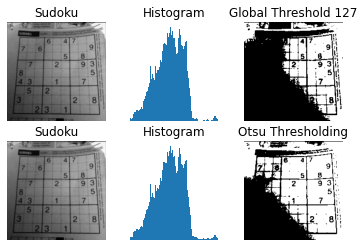

In [29]:
_, th1 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

images = [im, 0, th1,
          im, 0, th2]
titles = ["Sudoku", "Histogram", "Global Threshold 127",
          "Sudoku", "Histogram", "Otsu Thresholding"]

for i in range(2):
  plt.subplot(2, 3, i * 3 + 1)
  plt.imshow(images[i * 3], 'gray')
  plt.title(titles[i * 3])
  plt.axis("off")
  plt.subplot(2, 3, i * 3 + 2)
  plt.hist(images[i*3].ravel(), 256)
  plt.title(titles[i * 3 + 1])
  plt.axis("off")
  plt.subplot(2, 3, i * 3 + 3)
  plt.imshow(images[i * 3 + 2], 'gray')
  plt.title(titles[i * 3 + 2])
  plt.axis("off")
